In [21]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn import linear_model

%precision 3
%matplotlib inline

In [22]:
x=pd.read_csv("7-3-1-large-data.csv")
x.head(3)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_91,X_92,X_93,X_94,X_95,X_96,X_97,X_98,X_99,X_100
0,1.0000,0.5000,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,...,0.0110,0.0109,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100
1,0.5000,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,...,0.0109,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099
2,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,0.0833,...,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099,0.0098


표준화: 각각의 변수에서 평균값 빼고 표준편차로 나누는 작업

In [23]:
sp.mean(x, axis=0).head(3)

X_1    0.037272
X_2    0.030649
X_3    0.027360
dtype: float64

In [24]:
x-=sp.mean(x,axis=0)
x/=sp.std(x,ddof=1,axis=0)

In [25]:
#표준화 잘 됐는지 확인
sp.mean(x, axis=0).head(3).round(3)
sp.std(x, ddof=1, axis=0).head(3)

X_1    1.0
X_2    1.0
X_3    1.0
dtype: float64

시뮬레이션으로 종속변수 만들기

In [26]:
#정규분포를 따르는 노이즈
np.random.seed(1)
noise=sp.stats.norm.rvs(loc=0, scale=1, size=x.shape[0])
#올바른 계수를 5라고 설정해 종속변수 작성
y=x.X_1*5+noise

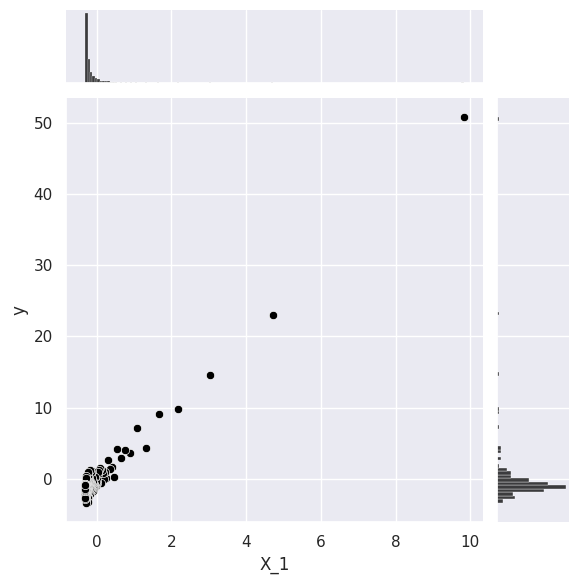

In [27]:
#종속변수와 독립변수 합치기
large_data=pd.concat([pd.DataFrame({"y":y}),x],axis=1)
#그래프 그리기
sns.jointplot(y="y",x="X_1",data=large_data, color='black')

sklearn을 이용한 선형회귀

In [33]:
#어떤 모델을 만들지 지정
lm_sklearn=linear_model.LinearRegression()
#데이터를 지정하여 모델 추정
lm_sklearn.fit(x,y)
#추정된 파라미터(array 형)
lm_sklearn.coef_

array([ 1.476e+01, -8.746e+01,  2.117e+02, -9.415e+01, -6.817e+01,
       -9.284e+01,  1.761e+00,  8.170e+01,  6.680e+01,  2.788e+01,
       -3.288e+01,  6.818e+01, -1.699e+01,  2.208e+01, -4.855e+01,
       -3.390e+01, -4.536e+01,  9.728e+00,  2.481e+01,  1.858e+00,
        1.599e+00, -2.838e+01,  6.477e+00, -5.980e+01,  3.532e+01,
       -1.302e+01,  4.108e+01, -4.303e+01,  5.247e+01,  1.920e+00,
        3.342e+01,  8.490e+00,  8.329e+00, -2.293e+01, -3.577e+01,
       -1.337e+01,  3.178e+01, -2.018e+01, -2.654e+01, -3.523e+01,
        1.927e+01,  4.823e+01, -1.655e+00,  5.749e-01, -1.893e+01,
        7.370e-01,  1.047e+01, -7.732e+00, -1.854e+00, -2.559e-01,
       -5.045e+00, -4.227e+00,  2.523e+01,  1.616e+01, -1.310e+01,
        6.455e+00, -1.332e+01, -2.291e+01, -1.202e+01,  7.745e+00,
        1.755e+01,  5.997e+00,  4.648e+00,  4.120e+00, -1.825e+00,
        5.366e+00,  4.546e+00, -2.598e+00, -4.091e+00,  7.496e+00,
        3.100e+01,  1.530e+01, -5.323e+00, -1.509e+01, -3.801e

일반적인 최소제곱법으로는 잘 되지 않는 것을 확인 - 정규화 필요

###리지회귀

리지회귀 - 벌칙항의 영향

In [34]:
n_alphas=50
ridge_alphas=np.logspace(-2, 0.7, n_alphas) #밑을 10으로 한 로그를 취한 등차수열

In [35]:
sp.log10(ridge_alphas)

array([-2.   , -1.945, -1.89 , -1.835, -1.78 , -1.724, -1.669, -1.614,
       -1.559, -1.504, -1.449, -1.394, -1.339, -1.284, -1.229, -1.173,
       -1.118, -1.063, -1.008, -0.953, -0.898, -0.843, -0.788, -0.733,
       -0.678, -0.622, -0.567, -0.512, -0.457, -0.402, -0.347, -0.292,
       -0.237, -0.182, -0.127, -0.071, -0.016,  0.039,  0.094,  0.149,
        0.204,  0.259,  0.314,  0.369,  0.424,  0.48 ,  0.535,  0.59 ,
        0.645,  0.7  ])

50개의 a를 바꿔가며 50번 리지 회귀로 추정, 파라미터로 a와 '절편은 추정하지 않는다'는 옵션 지정

In [37]:
#추정한 회귀계수를 저장할 리스트
ridge_coefs=[]
#for 루프로 리지 회귀 추정
for a in ridge_alphas:
  ridge=linear_model.Ridge(alpha=a, fit_intercept=False)
  ridge.fit(x,y)
  ridge_coefs.append(ridge.coef_)

In [38]:
ridge_coefs=np.array(ridge_coefs)
ridge_coefs.shape

(50, 100)

50개의 a와 100개의 독립변수로 이루어진 배열 -> 벌칙항 a값에 따른 회귀계수

Text(0, 0.5, 'Coefficients')

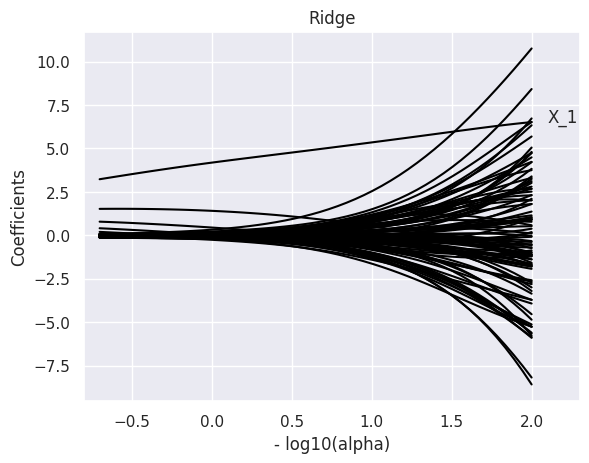

In [39]:
#a를 변환
log_alphas=-sp.log10(ridge_alphas)
#가로축을 -log10(a), 세로축을 계수로 하는 그래프
plt.plot(log_alphas, ridge_coefs, color='black')
#독립변수 X_1의 계수를 알기 쉽게 표시
plt.text(max(log_alphas)+0.1, np.array(ridge_coefs)[0,0],"X_1")
#x축의 범위
plt.xlim([min(log_alphas)-0.1,max(log_alphas)+0.3])
#축 레이블
plt.title("Ridge")
plt.xlabel("- log10(alpha)")
plt.ylabel("Coefficients")

가로축(-log10 a)이 왼쪽으로 갈수록 a가 크고 정교화 강도 셈

-> 왼쪽으로 갈수록 계수 절대치 작고 오른쪽으로 갈수록 크게 추정됨

최적의 정규화 강도 결정 - 교차검증법 이용

In [40]:
#CV에서 최적의 a를 구함
ridge_best=linear_model.RidgeCV(cv=10, alphas=ridge_alphas, fit_intercept=False)
ridge_best.fit(x,y)
#최적의 -log10(a)
-sp.log10(ridge_best.alpha_)

0.23673469387755094

해당 지점을 solution-path(위 그래프)에서 찾아보면 계수 절댓값이 0에 가까운 것으로 나타남

적합한 a

In [41]:
ridge_best.alpha_

0.5797827717179138

추정된 계수

In [42]:
ridge_best.coef_

array([ 4.463,  1.288,  0.293, -0.091, -0.201, -0.233, -0.215, -0.206,
       -0.145, -0.135, -0.155, -0.046, -0.097, -0.017, -0.11 , -0.012,
       -0.094,  0.013, -0.018, -0.031,  0.025, -0.029,  0.043, -0.087,
        0.127,  0.021,  0.055, -0.077,  0.141, -0.007,  0.099,  0.116,
       -0.044,  0.037, -0.034,  0.015,  0.123, -0.171, -0.007, -0.182,
        0.09 ,  0.222,  0.035, -0.032, -0.008,  0.025,  0.338, -0.193,
       -0.108,  0.212, -0.128, -0.246,  0.249,  0.128, -0.155,  0.27 ,
        0.03 , -0.165, -0.178,  0.158, -0.011,  0.013,  0.194,  0.134,
       -0.156, -0.018,  0.256,  0.223, -0.185,  0.006,  0.535,  0.181,
       -0.348, -0.123,  0.226, -0.043, -0.115, -0.053,  0.209,  0.189,
       -0.042, -0.205, -0.099,  0.059, -0.224,  0.15 , -0.039, -0.113,
        0.21 ,  0.012,  0.129, -0.032, -0.022, -0.229, -0.198,  0.245,
       -0.305, -0.396, -0.163,  0.164])

처음에 올바른 계수를 5라고 설정했는데 X_1의 계수가 4.463이 나와 성공적

###라소회귀

lasso_path: 파라미터로 데이터 지정하는 것만으로도 a를 다양하게 변화시킨 결과 출력

In [44]:
lasso_alphas, lasso_coefs, _=linear_model.lasso_path(x, y)

solution-path 구현

Text(0, 0.5, 'Coefficients')

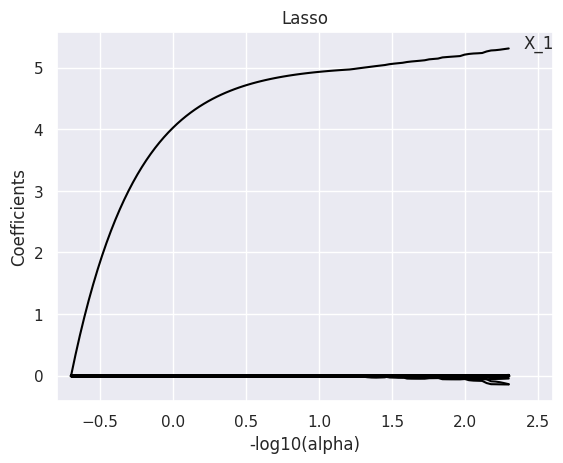

In [45]:
#a를 변환
log_alphas=-sp.log10(lasso_alphas)
#가로축을 -log10(a), 세로축을 계수로 하는 그래프
plt.plot(log_alphas, lasso_coefs.T, color='black')
#독립변수 X_1의 계수를 알기 쉽게 표시
plt.text(max(log_alphas)+0.1, lasso_coefs[0,-1],"X_1")
#x축의 범위
plt.xlim([min(log_alphas)-0.1,max(log_alphas)+0.3])
#축 레이블
plt.title("Lasso")
plt.xlabel("-log10(alpha)")
plt.ylabel("Coefficients")

라소회귀 - 최적의 정규화 강도 결정

In [47]:
#CV로 최적의 a를 구함
lasso_best=linear_model.LassoCV(cv=10, alphas=lasso_alphas, fit_intercept=False)
lasso_best.fit(x,y)
#최적의 -log(a)
-sp.log10(lasso_best.alpha_)

2.3010431777673266

In [48]:
lasso_best.alpha_

0.0049998482377299385

In [49]:
lasso_best.coef_

array([ 5.336e+00, -0.000e+00, -0.000e+00, -3.043e-01, -4.121e-02,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00,  0.000e+00, -0.000e+00,
        0.000e+00,  0.000e+00, -0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00, -0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        8.425e-03,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e

X_1의 계수가 5가 되었으므로 올바르게 모델링했다고 판단